In [1]:
import pickle
import gzip
import pandas as pd
import numpy as np
# from pymatgen.util import coord
from pymatgen.io.ase import AseAtomsAdaptor
from ase.visualize.plot import plot_atoms
from matplotlib import pyplot as plt

/home/ubuntu/.cache/pypoetry/virtualenvs/2d-defects-potential-learning-Azb2vZRm-py3.8/lib/python3.8/site-packages/pymatgen/core/__init__.py:49: UserWarning: Error loading .pmgrc.yaml: [Errno 2] No such file or directory: '/home/ubuntu/.pmgrc.yaml'. You may need to reconfigure your yaml file.
  warnings.warn(f"Error loading .pmgrc.yaml: {ex}. You may need to reconfigure your yaml file.")


In [2]:
with gzip.open('../datasets/processed/dichalcogenides_x1s6_202109_MoS2/data.pickle.gz', 'rb') as fh:
    data = pickle.load(fh, )

In [3]:
for i, d in data.iterrows():
    if (len(d.defect_representation) == 3 and 
            d.defect_representation[0].species_string=='W' and 
            d.defect_representation[1].species_string=='Se' and 
            d.defect_representation[2].species_string=='Se'):
        s0 = d.initial_structure
        d0 = d.defect_representation
        print(i)
        break

6141cf189cbada84a86767c3


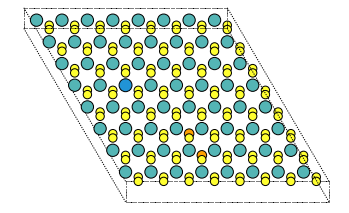

In [4]:
ase_atoms = AseAtomsAdaptor.get_atoms(s0)
fig, ax = plt.subplots()
plot_atoms(ase_atoms, ax, radii=0.5, rotation=('10x, 0y, 0z'), show_unit_cell=True)
xlim = 40
ylim = 23
ax.set_xlim(-2, xlim)
ax.set_ylim(-2, ylim)
ax.set_axis_off()
fig.savefig("substution_full.pdf", bbox_inches="tight")

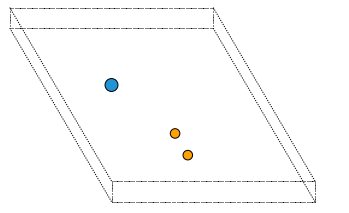

In [5]:
ase_atoms = AseAtomsAdaptor.get_atoms(d0)
fig, ax = plt.subplots()
plot_atoms(ase_atoms, ax, radii=0.5, rotation=('10x, 0y, 0z'), show_unit_cell=True)
x_offset=-10
y_offset=-3.5
ax.set_xlim(-2+x_offset, xlim+x_offset)
ax.set_ylim(-2+y_offset, ylim+y_offset)
ax.set_axis_off()
fig.savefig("substution_sparse.pdf", bbox_inches="tight")

In [6]:
from pymatgen.core.periodic_table import DummySpecies
for i, d in data.iterrows():
    if (len(d.defect_representation) == 3 and 
            isinstance(d.defect_representation[0].specie, DummySpecies)):
        s0 = d.initial_structure
        d0 = d.defect_representation
        print(i)
        break

6141cf133ac25c70a5c6c837


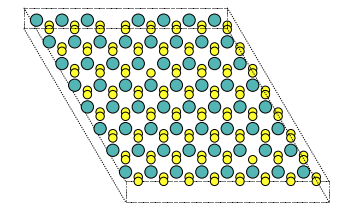

In [7]:
ase_atoms = AseAtomsAdaptor.get_atoms(s0)
fig, ax = plt.subplots()
plot_atoms(ase_atoms, ax, radii=0.5, rotation=('10x, 0y, 0z'), show_unit_cell=True)
xlim = 40
ylim = 23
ax.set_xlim(-2, xlim)
ax.set_ylim(-2, ylim)
ax.set_axis_off()
fig.savefig("vacancy_full.pdf", bbox_inches="tight")

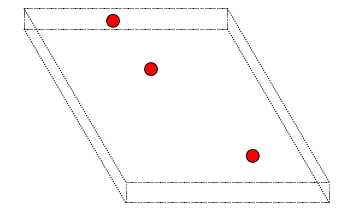

In [8]:
ase_atoms = AseAtomsAdaptor.get_atoms(d0)
fig, ax = plt.subplots()
plot_atoms(ase_atoms, ax, radii=4., rotation=('10x, 0y, 0z'), show_unit_cell=True)
x_offset=-10
y_offset=-3
ax.set_xlim(-2+x_offset, xlim+x_offset)
ax.set_ylim(-2+y_offset, ylim+y_offset)
ax.set_axis_off()
fig.savefig("vacancy_sparse.pdf", bbox_inches="tight")